In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True, linewidth=120)

In [28]:
# 파일 불러오기
dta = pd.read_excel('/home/ekim_reverse/PyCode/study/Python.study/toy_project/online_news_D1_re.xlsx')

In [29]:
dta.head()

,Date,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,...,topic10,topic11,topic12,topic13,topic14,topic15,topic16,topic17,topic18,topic19
0,2015-01-01,-0.000084,-0.000057,-0.000095,-0.000124,-0.000102,-0.000010,-1.481243e-05,-0.000089,-0.000133,...,-7.233976e-06,-0.000043,-0.000046,-0.000034,-0.000079,-0.000119,-0.000037,-0.000020,-0.000015,-0.000020
1,2015-01-02,-0.000009,-0.000012,-0.000016,-0.000017,-0.000027,-0.000001,-6.231306e-07,-0.000008,-0.000019,...,-4.154204e-07,-0.000006,-0.000010,-0.000005,-0.000015,-0.000007,-0.000009,-0.000008,-0.000003,-0.000001
2,2015-01-03,0.000465,0.000447,0.000536,0.000518,0.000625,0.000107,1.250715e-04,0.000393,0.000786,...,0.000000e+00,0.000482,0.000250,0.000357,0.000500,0.000411,0.000465,0.000197,0.000125,0.000071
3,2015-01-04,-0.000330,-0.000499,-0.000385,-0.000354,-0.000690,-0.000160,-1.558540e-05,-0.000096,-0.000528,...,-1.781189e-05,-0.000127,-0.000183,-0.000243,-0.000363,-0.000094,-0.000325,-0.000131,-0.000107,-0.000040
4,2015-01-05,0.000276,0.000272,0.000269,0.000361,0.000490,0.000076,1.647104e-05,0.000084,0.000535,...,2.153905e-05,0.000123,0.000196,0.000186,0.000298,0.000122,0.000228,0.000131,0.000035,0.000058


In [30]:
dta.max()

Date       2016-12-23 00:00:00
topic0              0.00692695
topic1              0.00909091
topic2              0.00779221
topic3               0.0181818
topic4                0.025974
topic5               0.0012987
topic6             0.000968992
topic7              0.00433592
topic8               0.0369318
topic9               0.0155844
topic10             0.00140056
topic11              0.0103896
topic12             0.00852273
topic13              0.0181818
topic14              0.0220779
topic15             0.00671704
topic16              0.0233766
topic17             0.00568182
topic18             0.00428363
topic19              0.0025974
dtype: object

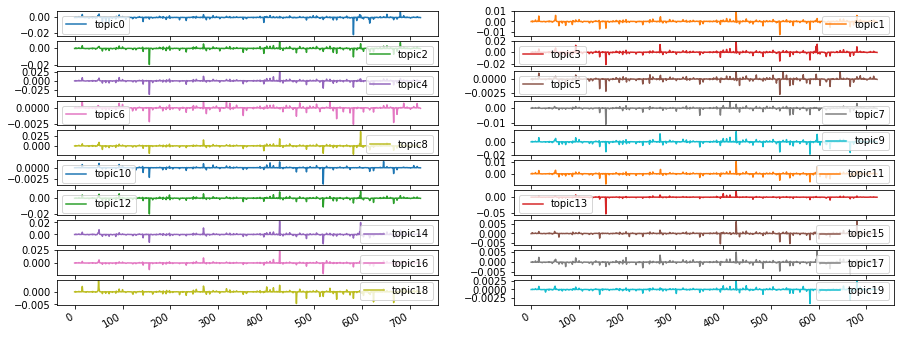

In [4]:
# 그래프로 확인하기
dta.loc[:, 'topic0':'topic19'].plot(subplots=True, layout=(10, 2), figsize=(15, 6));

In [31]:
# 열 이름 변경
dta = dta.rename(columns={'Unnamed: 0':'Date'}) 

In [32]:
# index 열 변경
dta = dta.set_index("Date")

In [33]:
dta

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15,topic16,topic17,topic18,topic19
Date,,,,,,,,,,,,,,,,,,,,
2015-01-01,-0.000084,-0.000057,-0.000095,-0.000124,-0.000102,-0.000010,-1.481243e-05,-0.000089,-0.000133,-0.000079,-7.233976e-06,-0.000043,-0.000046,-0.000034,-0.000079,-0.000119,-0.000037,-0.000020,-0.000015,-0.000020
2015-01-02,-0.000009,-0.000012,-0.000016,-0.000017,-0.000027,-0.000001,-6.231306e-07,-0.000008,-0.000019,-0.000021,-4.154204e-07,-0.000006,-0.000010,-0.000005,-0.000015,-0.000007,-0.000009,-0.000008,-0.000003,-0.000001
2015-01-03,0.000465,0.000447,0.000536,0.000518,0.000625,0.000107,1.250715e-04,0.000393,0.000786,0.000715,0.000000e+00,0.000482,0.000250,0.000357,0.000500,0.000411,0.000465,0.000197,0.000125,0.000071
2015-01-04,-0.000330,-0.000499,-0.000385,-0.000354,-0.000690,-0.000160,-1.558540e-05,-0.000096,-0.000528,-0.000269,-1.781189e-05,-0.000127,-0.000183,-0.000243,-0.000363,-0.000094,-0.000325,-0.000131,-0.000107,-0.000040
2015-01-05,0.000276,0.000272,0.000269,0.000361,0.000490,0.000076,1.647104e-05,0.000084,0.000535,0.000266,2.153905e-05,0.000123,0.000196,0.000186,0.000298,0.000122,0.000228,0.000131,0.000035,0.000058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-19,-0.000165,-0.000099,-0.000056,-0.000182,-0.000197,-0.000021,-1.878361e-05,-0.000032,-0.000142,-0.000100,-7.908890e-06,-0.000058,-0.000104,-0.000074,-0.000091,-0.000052,-0.000084,-0.000036,-0.000021,-0.000021
2016-12-20,0.000090,0.000135,0.000101,0.000197,0.000221,0.000032,1.141443e-05,0.000041,0.000158,0.000151,7.809871e-06,0.000099,0.000121,0.000094,0.000138,0.000035,0.000145,0.000055,0.000035,0.000020
2016-12-21,-0.000041,-0.000026,-0.000049,-0.000057,-0.000044,-0.000006,-8.655792e-06,-0.000025,-0.000069,-0.000048,-1.518560e-06,-0.000020,-0.000024,-0.000017,-0.000042,-0.000019,-0.000018,-0.000008,-0.000011,-0.000015


In [46]:
dta_t = dta.T

In [63]:
dta_tm = dta_t*10000

In [64]:
dta_tm.describe()

Date,2015-01-01,2015-01-02,2015-01-03,2015-01-04,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-10,...,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.603865,-0.098039,3.787879,-2.478079,2.022137,0.835905,-0.079365,0.510416,1.483911,7.352941,...,0.288579,-0.132485,11.904762,4.090697,0.015636,-0.781250,0.943492,-0.274708,-0.624133,-1.893939
std,0.411300,0.073606,2.201004,1.850193,1.471363,0.671670,0.058371,0.543544,1.436271,4.886589,...,0.243607,0.100368,7.299406,2.766482,0.011052,0.571999,0.631243,0.187868,0.380153,1.116358
min,-1.326229,-0.268639,0.000000,-6.902106,0.164710,0.054846,-0.209282,0.030398,0.100491,0.637308,...,0.010576,-0.389364,2.055498,0.657025,0.000758,-1.967336,0.078099,-0.686389,-1.354708,-4.289017
25%,-0.906831,-0.150417,1.786735,-3.562377,0.817217,0.218138,-0.120485,0.079450,0.521295,2.549232,...,0.076677,-0.195464,7.365536,1.785395,0.007702,-1.012091,0.352946,-0.423678,-0.894023,-2.731426
50%,-0.514990,-0.086200,4.288165,-2.126294,1.913175,0.750395,-0.071235,0.402087,0.996532,7.408706,...,0.253073,-0.120015,10.620075,3.485091,0.013224,-0.659898,0.967222,-0.220950,-0.624764,-1.851049
75%,-0.202379,-0.047427,5.047527,-1.040882,2.733559,1.211602,-0.038196,0.705380,2.263132,10.276592,...,0.436268,-0.059421,15.244947,6.427421,0.021992,-0.292876,1.393762,-0.143124,-0.305020,-0.993246
max,-0.072340,-0.004154,7.861635,-0.155854,5.346753,2.383315,-0.009334,2.285404,5.928946,16.092027,...,0.827964,-0.012510,27.064063,10.569537,0.037159,-0.079089,2.210794,-0.015186,-0.084143,-0.270885


In [65]:
dta_tm.mean()

Date
2015-01-01   -0.603865
2015-01-02   -0.098039
2015-01-03    3.787879
2015-01-04   -2.478079
2015-01-05    2.022137
                ...   
2016-12-19   -0.781250
2016-12-20    0.943492
2016-12-21   -0.274708
2016-12-22   -0.624133
2016-12-23   -1.893939
Length: 723, dtype: float64

In [66]:
type(dta_tm.mean())

pandas.core.series.Series

In [67]:
dta_tm.mean()['2015-01-01']

-0.6038647342995165

In [68]:
dta_tmt = dta_tm.T

In [69]:
dta_tmt

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15,topic16,topic17,topic18,topic19
Date,,,,,,,,,,,,,,,,,,,,
2015-01-01,-0.837074,-0.568384,-0.950751,-1.236665,-1.023091,-0.103343,-0.148124,-0.892190,-1.326229,-0.788848,-0.072340,-0.430594,-0.461597,-0.341030,-0.788848,-1.188439,-0.368588,-0.199796,-0.148124,-0.203240
2015-01-02,-0.090008,-0.116318,-0.155090,-0.170322,-0.268639,-0.014540,-0.006231,-0.081007,-0.192478,-0.209095,-0.004154,-0.063005,-0.099701,-0.054697,-0.148859,-0.074776,-0.092085,-0.082392,-0.025618,-0.011770
2015-01-03,4.645512,4.466838,5.360206,5.181532,6.253573,1.072041,1.250715,3.930818,7.861635,7.146941,0.000000,4.824185,2.501429,3.573471,5.002859,4.109491,4.645512,1.965409,1.250715,0.714694
2015-01-04,-3.295199,-4.987328,-3.851820,-3.540112,-6.902106,-1.603070,-0.155854,-0.957389,-5.276771,-2.694048,-0.178119,-1.269097,-1.825718,-2.426869,-3.629172,-0.935124,-3.250669,-1.313627,-1.068713,-0.400767
2015-01-05,2.762067,2.724057,2.686047,3.610959,4.903302,0.760202,0.164710,0.836222,5.346753,2.660707,0.215391,1.228993,1.963855,1.862495,2.977457,1.216323,2.280606,1.305013,0.354761,0.582821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-19,-1.650981,-0.993554,-0.563508,-1.823988,-1.967336,-0.207608,-0.187836,-0.321299,-1.418657,-1.003440,-0.079089,-0.583281,-1.038042,-0.736515,-0.914465,-0.519021,-0.840320,-0.360843,-0.207608,-0.207608
2016-12-20,0.895131,1.345701,1.009276,1.970490,2.210794,0.324410,0.114144,0.414524,1.579997,1.507906,0.078099,0.991253,1.207526,0.943192,1.375739,0.348440,1.447830,0.546691,0.354448,0.204258
2016-12-21,-0.411530,-0.259674,-0.485939,-0.569460,-0.437345,-0.060742,-0.086558,-0.252081,-0.686389,-0.479865,-0.015186,-0.197413,-0.244488,-0.174634,-0.419123,-0.186783,-0.180709,-0.083521,-0.107818,-0.154893


In [72]:
# log취하려고 하니, 음수때문에 NaN이 뜸.
# 따라서, 각각의 최솟값의 절댓값에 + 1 한 숫자를 더함
# 추후 함수라던지 최선책 *확인요망*

dta_tmt["topic0"] = dta_tmt["topic0"] - min(dta_tmt['topic0']) + 1
dta_tmt["topic1"] = dta_tmt["topic1"] - min(dta_tmt['topic1']) + 1
dta_tmt["topic2"] = dta_tmt["topic2"] - min(dta_tmt['topic2']) + 1
dta_tmt["topic3"] = dta_tmt["topic3"] - min(dta_tmt['topic3']) + 1
dta_tmt["topic4"] = dta_tmt["topic4"] - min(dta_tmt['topic4']) + 1
dta_tmt["topic5"] = dta_tmt["topic5"] - min(dta_tmt['topic5']) + 1
dta_tmt["topic6"] = dta_tmt["topic6"] - min(dta_tmt['topic6']) + 1
dta_tmt["topic7"] = dta_tmt["topic7"] - min(dta_tmt['topic7']) + 1
dta_tmt["topic8"] = dta_tmt["topic8"] - min(dta_tmt['topic8']) + 1
dta_tmt["topic9"] = dta_tmt["topic9"] - min(dta_tmt['topic9']) + 1
dta_tmt["topic10"] = dta_tmt["topic10"] - min(dta_tmt['topic10']) + 1
dta_tmt["topic11"] = dta_tmt["topic11"] - min(dta_tmt['topic11']) + 1
dta_tmt["topic12"] = dta_tmt["topic12"] - min(dta_tmt['topic12']) + 1
dta_tmt["topic13"] = dta_tmt["topic13"] - min(dta_tmt['topic13']) + 1
dta_tmt["topic14"] = dta_tmt["topic14"] - min(dta_tmt['topic14']) + 1
dta_tmt["topic15"] = dta_tmt["topic15"] - min(dta_tmt['topic15']) + 1
dta_tmt["topic16"] = dta_tmt["topic16"] - min(dta_tmt['topic16']) + 1
dta_tmt["topic17"] = dta_tmt["topic17"] - min(dta_tmt['topic17']) + 1
dta_tmt["topic18"] = dta_tmt["topic18"] - min(dta_tmt['topic18']) + 1
dta_tmt["topic19"] = dta_tmt["topic19"] - min(dta_tmt['topic19']) + 1

In [73]:
dta_tmt["topic0"]

Date
2015-01-01    223.530623
2015-01-02    224.277690
2015-01-03    229.013209
2015-01-04    221.072499
2015-01-05    227.129765
                 ...    
2016-12-19    222.716717
2016-12-20    225.262829
2016-12-21    223.956168
2016-12-22    223.467364
2016-12-23    222.516648
Name: topic0, Length: 723, dtype: float64

In [74]:
min(dta_tmt['topic0'])

1.0

In [75]:
# 차분
dta_tmt['dln_topic0'] = (np.log(dta_tmt.topic0)).diff() * 100
dta_tmt['dln_topic1'] = (np.log(dta_tmt.topic1)).diff() * 100
dta_tmt['dln_topic2'] = (np.log(dta_tmt.topic2)).diff() * 100
dta_tmt['dln_topic3'] = (np.log(dta_tmt.topic3)).diff() * 100
dta_tmt['dln_topic4'] = (np.log(dta_tmt.topic4)).diff() * 100
dta_tmt['dln_topic5'] = (np.log(dta_tmt.topic5)).diff() * 100
dta_tmt['dln_topic6'] = (np.log(dta_tmt.topic6)).diff() * 100
dta_tmt['dln_topic7'] = (np.log(dta_tmt.topic7)).diff() * 100
dta_tmt['dln_topic8'] = (np.log(dta_tmt.topic8)).diff() * 100
dta_tmt['dln_topic9'] = (np.log(dta_tmt.topic9)).diff() * 100
dta_tmt['dln_topic10'] = (np.log(dta_tmt.topic10)).diff() * 100
dta_tmt['dln_topic11'] = (np.log(dta_tmt.topic11)).diff() * 100
dta_tmt['dln_topic12'] = (np.log(dta_tmt.topic12)).diff() * 100
dta_tmt['dln_topic13'] = (np.log(dta_tmt.topic13)).diff() * 100
dta_tmt['dln_topic14'] = (np.log(dta_tmt.topic14)).diff() * 100
dta_tmt['dln_topic15'] = (np.log(dta_tmt.topic15)).diff() * 100
dta_tmt['dln_topic16'] = (np.log(dta_tmt.topic16)).diff() * 100
dta_tmt['dln_topic17'] = (np.log(dta_tmt.topic17)).diff() * 100
dta_tmt['dln_topic18'] = (np.log(dta_tmt.topic18)).diff() * 100
dta_tmt['dln_topic19'] = (np.log(dta_tmt.topic19)).diff() * 100

# 표준화
'''
dta['std_topic0'] = (dta['dln_topic0'] - dta['dln_topic0'].mean()) / dta['dln_topic0'].std()
dta['std_topic1'] = (dta['dln_topic1'] - dta['dln_topic1'].mean()) / dta['dln_topic1'].std()
dta['std_topic2'] = (dta['dln_topic2'] - dta['dln_topic2'].mean()) / dta['dln_topic2'].std()
dta['std_topic3'] = (dta['dln_topic3'] - dta['dln_topic3'].mean()) / dta['dln_topic3'].std()
dta['std_topic4'] = (dta['dln_topic4'] - dta['dln_topic4'].mean()) / dta['dln_topic4'].std()
dta['std_topic5'] = (dta['dln_topic5'] - dta['dln_topic5'].mean()) / dta['dln_topic5'].std()
dta['std_topic6'] = (dta['dln_topic6'] - dta['dln_topic6'].mean()) / dta['dln_topic6'].std()
dta['std_topic7'] = (dta['dln_topic7'] - dta['dln_topic7'].mean()) / dta['dln_topic7'].std()
dta['std_topic8'] = (dta['dln_topic8'] - dta['dln_topic8'].mean()) / dta['dln_topic8'].std()
dta['std_topic9'] = (dta['dln_topic9'] - dta['dln_topic9'].mean()) / dta['dln_topic9'].std()
dta['std_topic10'] = (dta['dln_topic10'] - dta['dln_topic10'].mean()) / dta['dln_topic10'].std()
dta['std_topic11'] = (dta['dln_topic11'] - dta['dln_topic11'].mean()) / dta['dln_topic11'].std()
dta['std_topic12'] = (dta['dln_topic12'] - dta['dln_topic12'].mean()) / dta['dln_topic12'].std()
dta['std_topic13'] = (dta['dln_topic13'] - dta['dln_topic13'].mean()) / dta['dln_topic13'].std()
dta['std_topic14'] = (dta['dln_topic14'] - dta['dln_topic14'].mean()) / dta['dln_topic14'].std()
dta['std_topic15'] = (dta['dln_topic15'] - dta['dln_topic15'].mean()) / dta['dln_topic15'].std()
dta['std_topic16'] = (dta['dln_topic16'] - dta['dln_topic16'].mean()) / dta['dln_topic16'].std()
dta['std_topic17'] = (dta['dln_topic17'] - dta['dln_topic17'].mean()) / dta['dln_topic17'].std()
dta['std_topic18'] = (dta['dln_topic18'] - dta['dln_topic18'].mean()) / dta['dln_topic18'].std()
dta['std_topic19'] = (dta['dln_topic19'] - dta['dln_topic19'].mean()) / dta['dln_topic19'].std()
'''


"\ndta['std_topic0'] = (dta['dln_topic0'] - dta['dln_topic0'].mean()) / dta['dln_topic0'].std()\ndta['std_topic1'] = (dta['dln_topic1'] - dta['dln_topic1'].mean()) / dta['dln_topic1'].std()\ndta['std_topic2'] = (dta['dln_topic2'] - dta['dln_topic2'].mean()) / dta['dln_topic2'].std()\ndta['std_topic3'] = (dta['dln_topic3'] - dta['dln_topic3'].mean()) / dta['dln_topic3'].std()\ndta['std_topic4'] = (dta['dln_topic4'] - dta['dln_topic4'].mean()) / dta['dln_topic4'].std()\ndta['std_topic5'] = (dta['dln_topic5'] - dta['dln_topic5'].mean()) / dta['dln_topic5'].std()\ndta['std_topic6'] = (dta['dln_topic6'] - dta['dln_topic6'].mean()) / dta['dln_topic6'].std()\ndta['std_topic7'] = (dta['dln_topic7'] - dta['dln_topic7'].mean()) / dta['dln_topic7'].std()\ndta['std_topic8'] = (dta['dln_topic8'] - dta['dln_topic8'].mean()) / dta['dln_topic8'].std()\ndta['std_topic9'] = (dta['dln_topic9'] - dta['dln_topic9'].mean()) / dta['dln_topic9'].std()\ndta['std_topic10'] = (dta['dln_topic10'] - dta['dln_topic

In [78]:
dta_tmt_r = round(dta_tmt,3)
dta_tmt_r

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,...,dln_topic10,dln_topic11,dln_topic12,dln_topic13,dln_topic14,dln_topic15,dln_topic16,dln_topic17,dln_topic18,dln_topic19
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,223.531,128.637,195.701,217.155,391.281,28.369,26.625,108.803,214.450,189.215,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,224.278,129.089,196.497,218.221,392.036,28.458,26.767,109.615,215.584,189.794,...,0.181,0.419,0.184,0.055,0.410,1.949,0.131,0.196,0.259,0.437
2015-01-03,229.013,133.672,202.012,223.573,398.558,29.545,28.024,113.626,223.638,197.150,...,0.011,5.411,1.315,0.692,3.238,7.001,2.215,3.361,2.661,1.640
2015-01-04,221.072,124.218,192.800,214.851,385.402,26.869,26.617,108.738,210.500,187.309,...,-0.474,-6.793,-2.197,-1.147,-5.487,-8.504,-3.719,-5.437,-4.890,-2.529
2015-01-05,227.130,131.929,199.338,222.002,397.208,29.233,26.938,110.532,221.123,192.664,...,1.045,2.841,1.926,0.821,4.226,3.715,2.620,4.366,3.030,2.233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-19,222.717,128.212,196.089,216.567,390.337,28.265,26.585,109.374,214.358,189.000,...,-0.212,-0.678,-0.539,-0.143,-0.601,-0.921,-0.405,-0.619,-0.447,-0.483
2016-12-20,225.263,130.551,197.661,220.362,394.515,28.797,26.887,110.110,217.357,191.511,...,0.418,1.786,1.141,0.321,1.460,1.504,1.080,1.510,1.185,0.937
2016-12-21,223.956,128.945,196.166,217.822,391.867,28.412,26.687,109.444,215.090,189.524,...,-0.248,-1.345,-0.737,-0.214,-1.142,-0.925,-0.767,-1.046,-0.974,-0.817


In [79]:
dta_tmt_r['std_topic0'] = (dta_tmt_r['dln_topic0'] - dta_tmt_r['dln_topic0'].mean()) / dta_tmt_r['dln_topic0'].std()
dta_tmt_r['std_topic1'] = (dta_tmt_r['dln_topic1'] - dta_tmt_r['dln_topic1'].mean()) / dta_tmt_r['dln_topic1'].std()
dta_tmt_r['std_topic2'] = (dta_tmt_r['dln_topic2'] - dta_tmt_r['dln_topic2'].mean()) / dta_tmt_r['dln_topic2'].std()
dta_tmt_r['std_topic3'] = (dta_tmt_r['dln_topic3'] - dta_tmt_r['dln_topic3'].mean()) / dta_tmt_r['dln_topic3'].std()
dta_tmt_r['std_topic4'] = (dta_tmt_r['dln_topic4'] - dta_tmt_r['dln_topic4'].mean()) / dta_tmt_r['dln_topic4'].std()
dta_tmt_r['std_topic5'] = (dta_tmt_r['dln_topic5'] - dta_tmt_r['dln_topic5'].mean()) / dta_tmt_r['dln_topic5'].std()
dta_tmt_r['std_topic6'] = (dta_tmt_r['dln_topic6'] - dta_tmt_r['dln_topic6'].mean()) / dta_tmt_r['dln_topic6'].std()
dta_tmt_r['std_topic7'] = (dta_tmt_r['dln_topic7'] - dta_tmt_r['dln_topic7'].mean()) / dta_tmt_r['dln_topic7'].std()
dta_tmt_r['std_topic8'] = (dta_tmt_r['dln_topic8'] - dta_tmt_r['dln_topic8'].mean()) / dta_tmt_r['dln_topic8'].std()
dta_tmt_r['std_topic9'] = (dta_tmt_r['dln_topic9'] - dta_tmt_r['dln_topic9'].mean()) / dta_tmt_r['dln_topic9'].std()
dta_tmt_r['std_topic10'] = (dta_tmt_r['dln_topic10'] - dta_tmt_r['dln_topic10'].mean()) / dta_tmt_r['dln_topic10'].std()
dta_tmt_r['std_topic11'] = (dta_tmt_r['dln_topic11'] - dta_tmt_r['dln_topic11'].mean()) / dta_tmt_r['dln_topic11'].std()
dta_tmt_r['std_topic12'] = (dta_tmt_r['dln_topic12'] - dta_tmt_r['dln_topic12'].mean()) / dta_tmt_r['dln_topic12'].std()
dta_tmt_r['std_topic13'] = (dta_tmt_r['dln_topic13'] - dta_tmt_r['dln_topic13'].mean()) / dta_tmt_r['dln_topic13'].std()
dta_tmt_r['std_topic14'] = (dta_tmt_r['dln_topic14'] - dta_tmt_r['dln_topic14'].mean()) / dta_tmt_r['dln_topic14'].std()
dta_tmt_r['std_topic15'] = (dta_tmt_r['dln_topic15'] - dta_tmt_r['dln_topic15'].mean()) / dta_tmt_r['dln_topic15'].std()
dta_tmt_r['std_topic16'] = (dta_tmt_r['dln_topic16'] - dta_tmt_r['dln_topic16'].mean()) / dta_tmt_r['dln_topic16'].std()
dta_tmt_r['std_topic17'] = (dta_tmt_r['dln_topic17'] - dta_tmt_r['dln_topic17'].mean()) / dta_tmt_r['dln_topic17'].std()
dta_tmt_r['std_topic18'] = (dta_tmt_r['dln_topic18'] - dta_tmt_r['dln_topic18'].mean()) / dta_tmt_r['dln_topic18'].std()
dta_tmt_r['std_topic19'] = (dta_tmt_r['dln_topic19'] - dta_tmt_r['dln_topic19'].mean()) / dta_tmt_r['dln_topic19'].std()

In [80]:
dta_tmt_r

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,...,std_topic10,std_topic11,std_topic12,std_topic13,std_topic14,std_topic15,std_topic16,std_topic17,std_topic18,std_topic19
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,223.531,128.637,195.701,217.155,391.281,28.369,26.625,108.803,214.450,189.215,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,224.278,129.089,196.497,218.221,392.036,28.458,26.767,109.615,215.584,189.794,...,0.008813,0.015033,0.006374,0.001667,0.013454,0.062220,0.004429,0.007523,0.009239,0.019322
2015-01-03,229.013,133.672,202.012,223.573,398.558,29.545,28.024,113.626,223.638,197.150,...,0.000569,0.193397,0.045329,0.020882,0.105871,0.223495,0.074379,0.128054,0.094065,0.072349
2015-01-04,221.072,124.218,192.800,214.851,385.402,26.869,26.617,108.738,210.500,187.309,...,-0.022952,-0.242651,-0.075633,-0.034591,-0.179257,-0.271470,-0.124796,-0.206996,-0.172596,-0.111416
2015-01-05,227.130,131.929,199.338,222.002,397.208,29.233,26.938,110.532,221.123,192.664,...,0.050714,0.101571,0.066373,0.024773,0.138158,0.118596,0.087972,0.166327,0.107096,0.098488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-19,222.717,128.212,196.089,216.567,390.337,28.265,26.585,109.374,214.358,189.000,...,-0.010246,-0.024163,-0.018527,-0.004306,-0.019585,-0.029399,-0.013561,-0.023514,-0.015693,-0.021230
2016-12-20,225.263,130.551,197.661,220.362,394.515,28.797,26.887,110.110,217.357,191.511,...,0.020307,0.063876,0.039336,0.009691,0.047767,0.048015,0.036282,0.057563,0.041940,0.041362
2016-12-21,223.956,128.945,196.166,217.822,391.867,28.412,26.687,109.444,215.090,189.524,...,-0.011992,-0.047994,-0.025347,-0.006447,-0.037265,-0.029526,-0.025712,-0.039776,-0.034304,-0.035953


In [82]:
# 표준화된 데이터 가져오기
endog = dta_tmt_r.loc['2015-01-02':, 'std_topic0':'std_topic19']

In [83]:
endog

,std_topic0,std_topic1,std_topic2,std_topic3,std_topic4,std_topic5,std_topic6,std_topic7,std_topic8,std_topic9,std_topic10,std_topic11,std_topic12,std_topic13,std_topic14,std_topic15,std_topic16,std_topic17,std_topic18,std_topic19
Date,,,,,,,,,,,,,,,,,,,,
2015-01-02,0.011466,0.012460,0.013945,0.015510,0.005931,0.013768,0.021738,0.028390,0.014820,0.008997,0.008813,0.015033,0.006374,0.001667,0.013454,0.062220,0.004429,0.007523,0.009239,0.019322
2015-01-03,0.071597,0.122858,0.094876,0.076560,0.050441,0.163790,0.186649,0.137167,0.102966,0.111187,0.000569,0.193397,0.045329,0.020882,0.105871,0.223495,0.074379,0.128054,0.094065,0.072349
2015-01-04,-0.120891,-0.257941,-0.159876,-0.125633,-0.102518,-0.414541,-0.209228,-0.167654,-0.169862,-0.149593,-0.022952,-0.242651,-0.075633,-0.034591,-0.179257,-0.271470,-0.124796,-0.206996,-0.172596,-0.111416
2015-01-05,0.092634,0.212006,0.114304,0.103437,0.092201,0.368377,0.048769,0.062450,0.138213,0.082433,0.050714,0.101571,0.066373,0.024773,0.138158,0.118596,0.087972,0.166327,0.107096,0.098488
2015-01-06,-0.026326,-0.036406,-0.032072,-0.028263,-0.023702,-0.081470,-0.016513,-0.021460,-0.037826,-0.022768,-0.001371,-0.007620,-0.022419,-0.008197,-0.028768,-0.052224,-0.018126,-0.052267,-0.019966,-0.043534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-19,-0.025606,-0.027470,-0.010177,-0.026905,-0.015606,-0.032540,-0.028911,-0.011429,-0.018967,-0.015755,-0.010246,-0.024163,-0.018527,-0.004306,-0.019585,-0.029399,-0.013561,-0.023514,-0.015693,-0.021230
2016-12-20,0.038979,0.063719,0.027411,0.054894,0.032569,0.081571,0.046005,0.025644,0.039011,0.038628,0.020307,0.063876,0.039336,0.009691,0.047767,0.048015,0.036282,0.057563,0.041940,0.041362
2016-12-21,-0.019919,-0.043407,-0.025973,-0.036570,-0.020555,-0.058753,-0.030333,-0.023100,-0.029379,-0.030424,-0.011992,-0.047994,-0.025347,-0.006447,-0.037265,-0.029526,-0.025712,-0.039776,-0.034304,-0.035953


In [84]:
# 모델 만들기
mod = sm.tsa.DynamicFactor(endog, k_factors=1, factor_order=2, error_order=2) 

/home/ekim_reverse/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [85]:
initial_res = mod.fit(method='powell', disp=False)
res = mod.fit(initial_res.params, disp=False)

In [86]:
print(res.summary(separate_params=False))

                                                                                                                                                                   Statespace Model Results                                                                                                                                                                   
Dep. Variable:     ['std_topic0', 'std_topic1', 'std_topic2', 'std_topic3', 'std_topic4', 'std_topic5', 'std_topic6', 'std_topic7', 'std_topic8', 'std_topic9', 'std_topic10', 'std_topic11', 'std_topic12', 'std_topic13', 'std_topic14', 'std_topic15', 'std_topic16', 'std_topic17', 'std_topic18', 'std_topic19']   No. Observations:                  722
Model:                                                                                                                                                                                                                                                                              DynamicFactor(factors=

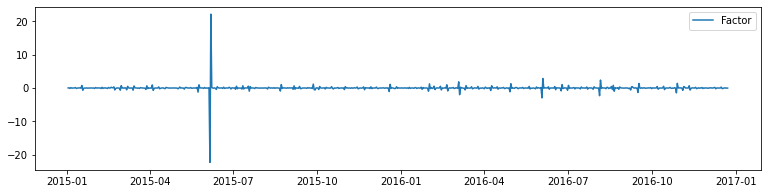

In [87]:
from pandas_datareader.data import DataReader
fig, ax = plt.subplots(figsize=(13,3))

# Plot the factor
dates = endog.index._mpl_repr()
ax.plot(dates, res.factors.filtered[0], label='Factor')
ax.legend()

# 경기침체 그래프 추가 (회색)
# start = '2015-01-02'
# end = '2016-12-23'
# rec = DataReader('USREC', 'fred', start=start, end=end)
# ylim = ax.get_ylim()
# ax.fill_between(dates[:-3], ylim[0], ylim[1], rec.values[:-4,0], facecolor='k', alpha=0.1);

In [95]:
res.factors.filtered[0][154:158]

array([  0.0512, -22.3415,  22.189 ,   0.117 ])

In [89]:
max(res.factors.filtered[0])

22.188967887955954

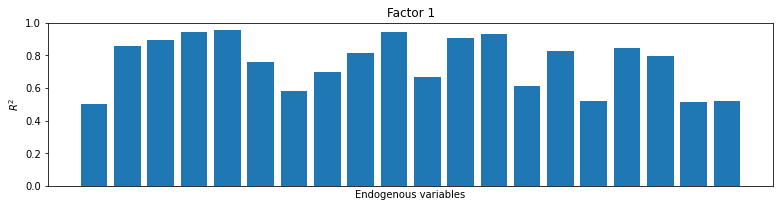

In [19]:
res.plot_coefficients_of_determination(figsize=(13,3));

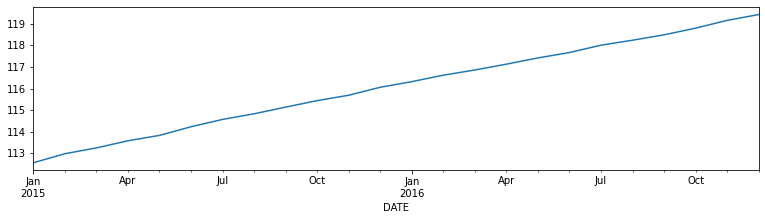

In [20]:
usphci = DataReader('USPHCI', 'fred', start='2015-01-01', end='2016-12-31')['USPHCI']
usphci.plot(figsize=(13,3));

In [21]:
def compute_coincident_index(mod, res):
    # Estimate W(1)
    spec = res.specification
    design = mod.ssm['design']
    transition = mod.ssm['transition']
    ss_kalman_gain = res.filter_results.kalman_gain[:,:,-1]  # kalman filter
    k_states = ss_kalman_gain.shape[0]

    W1 = np.linalg.inv(np.eye(k_states) - np.dot(
        np.eye(k_states) - np.dot(ss_kalman_gain, design),
        transition
    )).dot(ss_kalman_gain)[0]

    # Compute the factor mean vector
    factor_mean = np.dot(W1, dta.loc[:, 'dln_topic0':'dln_topic19'].mean())

    # Normalize the factors
    factor = res.factors.filtered[0]
    factor *= np.std(usphci.diff()[1:]) / np.std(factor)

    # Compute the coincident index
    coincident_index = np.zeros(mod.nobs+1)
#     The initial value is arbitrary; here it is set to
#     facilitate comparison
    coincident_index[0] = usphci.iloc[0] * factor_mean / dusphci.mean()
    for t in range(0, mod.nobs):
        coincident_index[t+1] = coincident_index[t] + factor[t] + factor_mean

    # Attach dates / Series
    coincident_index = pd.Series(coincident_index, index=dta.index).iloc[1:]

    # Normalize to use the same base year as USPHCI
    coincident_index *= (usphci.loc['2015-07-01'] / coincident_index.loc['2015-07-01'])

    return coincident_index

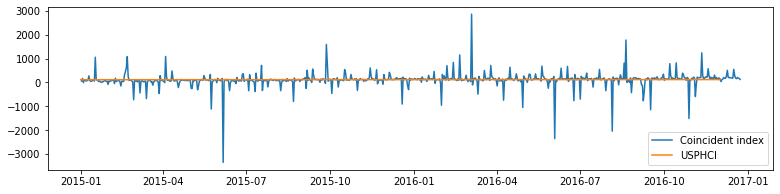

In [22]:
dusphci = usphci.diff()[1:].values
fig, ax = plt.subplots(figsize=(13,3))

# Compute the index
coincident_index = compute_coincident_index(mod, res)

# Plot the factor
dates = endog.index._mpl_repr()
ax.plot(dates, coincident_index, label='Coincident index')
ax.plot(usphci.index._mpl_repr(), usphci, label='USPHCI')
ax.legend(loc='lower right')

# Retrieve and also plot the NBER recession indicators
# ylim = ax.get_ylim()
# ax.fill_between(dates[:-3], ylim[0], ylim[1], rec.values[:-4,0], facecolor='k', alpha=0.1);

In [23]:
from statsmodels.tsa.statespace import tools
class ExtendedDFM(sm.tsa.DynamicFactor):
    def __init__(self, endog, **kwargs):
            # Setup the model as if we had a factor order of 4
            super(ExtendedDFM, self).__init__(
                endog, k_factors=1, factor_order=4, error_order=2,
                **kwargs)

            # Note: `self.parameters` is an ordered dict with the
            # keys corresponding to parameter types, and the values
            # the number of parameters of that type.
            # Add the new parameters
            self.parameters['new_loadings'] = 3

            # Cache a slice for the location of the 4 factor AR
            # parameters (a_1, ..., a_4) in the full parameter vector
            offset = (self.parameters['factor_loadings'] +
                      self.parameters['exog'] +
                      self.parameters['error_cov'])
            self._params_factor_ar = np.s_[offset:offset+2]
            self._params_factor_zero = np.s_[offset+2:offset+4]

    @property
    def start_params(self):
        # Add three new loading parameters to the end of the parameter
        # vector, initialized to zeros (for simplicity; they could
        # be initialized any way you like)
        return np.r_[super(ExtendedDFM, self).start_params, 0, 0, 0]

    @property
    def param_names(self):
        # Add the corresponding names for the new loading parameters
        #  (the name can be anything you like)
        return super(ExtendedDFM, self).param_names + [
            'loading.L%d.f1.%s' % (i, self.endog_names[3]) for i in range(1,4)]

    def transform_params(self, unconstrained):
            # Perform the typical DFM transformation (w/o the new parameters)
            constrained = super(ExtendedDFM, self).transform_params(
            unconstrained[:-3])

            # Redo the factor AR constraint, since we only want an AR(2),
            # and the previous constraint was for an AR(4)
            ar_params = unconstrained[self._params_factor_ar]
            constrained[self._params_factor_ar] = (
                tools.constrain_stationary_univariate(ar_params))

            # Return all the parameters
            return np.r_[constrained, unconstrained[-3:]]

    def untransform_params(self, constrained):
            # Perform the typical DFM untransformation (w/o the new parameters)
            unconstrained = super(ExtendedDFM, self).untransform_params(
                constrained[:-3])

            # Redo the factor AR unconstrained, since we only want an AR(2),
            # and the previous unconstrained was for an AR(4)
            ar_params = constrained[self._params_factor_ar]
            unconstrained[self._params_factor_ar] = (
                tools.unconstrain_stationary_univariate(ar_params))

            # Return all the parameters
            return np.r_[unconstrained, constrained[-3:]]

    def update(self, params, transformed=True, **kwargs):
        # Peform the transformation, if required
        if not transformed:
            params = self.transform_params(params)
        params[self._params_factor_zero] = 0

        # Now perform the usual DFM update, but exclude our new parameters
        super(ExtendedDFM, self).update(params[:-3], transformed=True, **kwargs)

        # Finally, set our new parameters in the design matrix
        self.ssm['design', 3, 1:4] = params[-3:]

In [24]:
# Create the model
extended_mod = ExtendedDFM(endog)
initial_extended_res = extended_mod.fit(maxiter=1000, disp=False)
extended_res = extended_mod.fit(initial_extended_res.params, method='nm', maxiter=1000)
print(extended_res.summary(separate_params=False))

/home/ekim_reverse/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/ekim_reverse/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


/home/ekim_reverse/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                                                                                                                                                   Statespace Model Results                                                                                                                                                                   
Dep. Variable:     ['std_topic0', 'std_topic1', 'std_topic2', 'std_topic3', 'std_topic4', 'std_topic5', 'std_topic6', 'std_topic7', 'std_topic8', 'std_topic9', 'std_topic10', 'std_topic11', 'std_topic12', 'std_topic13', 'std_topic14', 'std_topic15', 'std_topic16', 'std_topic17', 'std_topic18', 'std_topic19']   No. Observations:                  722
Model:                                                                                                                                                                                                                                                                              DynamicFactor(factors=

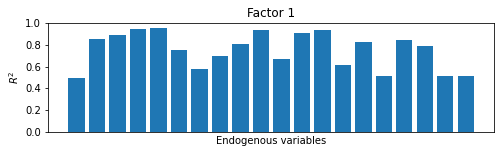

In [25]:
extended_res.plot_coefficients_of_determination(figsize=(8,2));

[Text(0.5, 1.0, 'Coincident indices, comparison')]

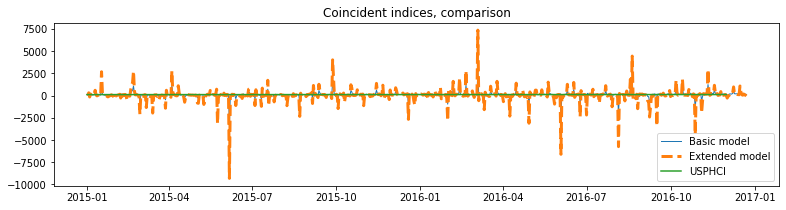

In [26]:
fig, ax = plt.subplots(figsize=(13,3))

# Compute the index
extended_coincident_index = compute_coincident_index(extended_mod, extended_res)

# Plot the factor
dates = endog.index._mpl_repr()
ax.plot(dates, coincident_index, '-', linewidth=1, label='Basic model')
ax.plot(dates, extended_coincident_index, '--', linewidth=3, label='Extended model')
ax.plot(usphci.index._mpl_repr(), usphci, label='USPHCI')
ax.legend(loc='lower right')
ax.set(title='Coincident indices, comparison')

# Retrieve and also plot the NBER recession indicators
# ylim = ax.get_ylim()
# ax.fill_between(dates[:-3], ylim[0], ylim[1], rec.values[:-4,0], facecolor='k', alpha=0.1);